# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_out_hubei = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/clean-outside-hubei.csv'
df_out_hubei = pd.read_csv(url_out_hubei, encoding="latin-1")


In [3]:
url_hubei = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/clean-hubei.csv'
df_hubei = pd.read_csv(url_hubei)


In [4]:
df_china = pd.concat([df_hubei,df_out_hubei],ignore_index=True)

Dropping 'id' because it is not relevant.

In [5]:
df_china = df_china.drop(columns=["id"])

In [6]:
shape = df_china.shape
print('The df has {0} entries and {1} features.'.format(shape[0],shape[1]))

The df has 18527 entries and 30 features.


In [7]:
print(df_china.dtypes)

age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                       object
admin1                      

In [8]:
# missing data - part I
total = df_china.isnull().sum().sort_values(ascending=False)

percentage = (df_china.isnull().sum()/df_china.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percentage], axis=1,keys = ['Total','Percentage'])
missing_data.head(30)

,Total,Percentage
sequence_available,18524,0.999838
chronic_disease,18496,0.998327
chronic_disease_binary,18490,0.998003
reported_market_exposure,18488,0.997895
notes_for_discussion,18442,0.995412
date_death_or_discharge,18433,0.994926
outcome,18407,0.993523
location,18361,0.991040
symptoms,18177,0.981109
travel_history_dates,18135,0.978842


In [9]:
df_columns = list(df_china.columns)
for col in df_china.columns:
    print('{} : {}'.format(col,df_china[col].unique()))

age : ['15-88' '32' '49' '66' '48' '89' '61' '69' '75' '82' '81' '65' '80' '53'
 '86' '70' '84' nan '21-39' '40-49' '50-59' '60-69' '70-82' '25-89' '76'
 '72' '79' '55' '87' '58' '78' '67' '85' '36' '73' '30' '47' '50' '42'
 '59' '39' '38' '45' '33' '37' '18' '56' '44' '21' '41' '43' '31' '24'
 '40' '10' '63' '62' '46' '34' '20' '54' '2' '29' '51' '28' '68' '57' '35'
 '27' '52' '22' '23' '88' '19' '60' '25' '36-45' '26' '64' '30-39' '11'
 '74' '7' '15' '16' '80-89' '27-40' '5' '3' '4' '71' '20-29' '77' '16-80'
 '94' '38-68' '23-72' '0' '17' '8' '9' '12' '1']
sex : ['male' 'female' nan]
city : ['Wuhan City' 'Xiaogan City' 'Huanggang City' 'Jingzhou City'
 'Jingmen City' 'Xiantao City' "Yuan'an County, Yichang City"
 'Shiyan City' 'Enshi Prefecture' 'Suizhou City' 'Tianmen City'
 'Ezhou City' 'Xiangyang City' 'Yichang City' 'Xianning City'
 'Huangshi City' 'Qianjiang City' 'Shennongjia Forest District'
 'Chaohu City, Hefei City' 'Baohe District, Hefei City'
 'High-Tech Zone, Hefei City' 

Our goal is to study which symptoms are the most common, regarding age, gender, chronic diseases and (possibly) other features of the same nature. Therefore, other features will be dropped.

In [10]:
df_china = df_china.drop(columns=['city','country','chronic_disease_binary',
                                  'province','latitude','longitude',
                                  'geo_resolution','lives_in_wuhan','source',
                                  'country_new','travel_history_dates',
                                  'travel_history_location','admin_id',
                                  'reported_market_exposure','country_new',
                                  'sequence_available','notes_for_discussion',
                                  'location','admin1','admin2','admin3'])

In [11]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18527 entries, 0 to 18526
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1031 non-null   object
 1   sex                      841 non-null    object
 2   date_onset_symptoms      574 non-null    object
 3   date_admission_hospital  568 non-null    object
 4   date_confirmation        17614 non-null  object
 5   symptoms                 350 non-null    object
 6   additional_information   591 non-null    object
 7   chronic_disease          31 non-null     object
 8   outcome                  120 non-null    object
 9   date_death_or_discharge  94 non-null     object
dtypes: object(10)
memory usage: 1.4+ MB


In [12]:
df_china

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,additional_information,chronic_disease,outcome,date_death_or_discharge
0,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN
1,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN
2,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN
3,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN
4,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18522,NaN,NaN,NaN,NaN,03.02.2020,NaN,NaN,NaN,NaN,NaN
18523,NaN,NaN,NaN,NaN,03.02.2020,NaN,NaN,NaN,NaN,NaN
18524,NaN,NaN,NaN,NaN,03.02.2020,NaN,NaN,NaN,NaN,NaN
18525,NaN,NaN,NaN,NaN,03.02.2020,NaN,NaN,NaN,NaN,NaN


In [13]:
# missing data - part I
total = df_china.isnull().sum().sort_values(ascending=False)

percentage = (df_china.isnull().sum()/df_china.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percentage], axis=1,keys = ['Total','Percentage'])
missing_data.head(9)

,Total,Percentage
chronic_disease,18496,0.998327
date_death_or_discharge,18433,0.994926
outcome,18407,0.993523
symptoms,18177,0.981109
date_admission_hospital,17959,0.969342
date_onset_symptoms,17953,0.969018
additional_information,17936,0.968101
sex,17686,0.954607
age,17496,0.944351


See how NAs situation is:

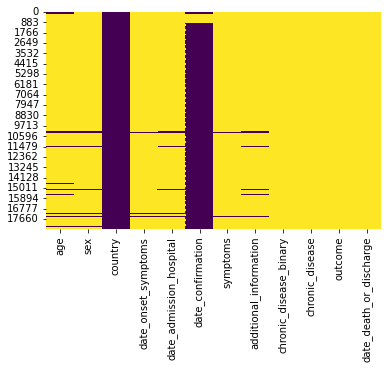

In [ ]:
sns.heatmap(df_china.isnull(),cbar=False,cmap='viridis')

# Symptoms

Correcting semi-colons and putting commas.

In [ ]:
df_china['symptoms'] = df_china['symptoms'].replace(';', ',', regex=True)

In [ ]:
df_china['symptoms'] = df_china['symptoms'].fillna('-')

In [ ]:
def curate_symptom(symptom):
  if (symptom == 'chest discomfort' or symptom == 'dyspnea' or 
      symptom == 'respiratory stress' or symptom == 'chest distress' or 
      symptom == 'shortness of breath' or symptom == 'grasp' or 
      symptom == 'gasp' or symptom == 'chest pain' or 
      symptom == 'pneumonia' or symptom == 'respiratory symptoms' or 
      symptom == 'anhelation' or symptom == 'pleural effusion' or
      symptom == 'nasal congestion' or symptom == 'pleuritic chest pain' or 
      symptom == 'chest tightness' or symptom == 'lesions on chest radiographs' or
      symptom == 'pneumonitis' or symptom == 'acute respiratory viral infection' or 
      symptom == 'shortness breath' or symptom == 'respiratory distress' or 
      symptom == 'respiratory problems'):
    return'difficulty breathing'
  

  elif (symptom == 'fatigure' or symptom == 'muscular soreness' or
        symptom == 'somnolence' or symptom == 'weak' or 
        symptom == 'discomfort' or symptom == 'weakness' or
        symptom == 'muscular stiffness' or symptom == 'sore limbs' or 
        symptom == 'muscle aches' or symptom == 'sore muscle' or 
        symptom == 'rigor' or symptom == 'lack of energy' or 
        symptom == 'muscle pain' or symptom == 'fatigue' or 
        symptom == 'joint pain' or symptom == 'myalgias' or 
        symptom == 'myalgia' or symptom == 'aching muscles' or 
        symptom == 'physical discomfort' or symptom == 'systemic weakness' or 
        symptom == 'muscle ache' or symptom == 'muscle soreness' or
        symptom == 'sore body'):
    return 'soreness'


  elif (symptom == 'little sputum' or symptom == 'expectoration' or
        symptom == 'dry cough' or symptom == 'sputum' or 
        symptom == 'coughing' or symptom == 'dry throat'):
    return 'cough'


  elif (symptom == 'emesis' or symptom == 'dizziness' or 
        symptom == 'vomiting'):
    return 'nausea'


  elif (symptom == 'cold chills' or symptom == 'sensation of chill' or 
        symptom == 'chills' or symptom == 'sweating' or symptom == 'cold'):
    return 'fever'


  elif (symptom == 'sneezing' or symptom == 'sneeze' or
        symptom == 'runny nose' or symptom == 'rhinorrhea'):
    return 'rhinorrhoea'


  elif (symptom == 'pharynx' or symptom == 'pharyngalgia' or 
        symptom == 'pharyngeal discomfort'):
    return 'sore throat'


  elif (symptom == 'flu-like symptoms' or 
        symptom == 'eventually showed acute left heart failure and acute coronary syndrome'):
    return 'other symptoms'


  elif symptom == 'diarrhoea':
    return 'diarrhea'

  else:
    return symptom



In [ ]:
def get_symptoms(sentence):
  answer = []
  result = sentence.split(',')
  for sentence in result:
    answer.append(curate_symptom(sentence.strip()))
  return answer

df_symptoms = pd.DataFrame()

df_symptoms['symptoms_in_list'] = df_china['symptoms'].apply(get_symptoms)

lista_listas_sintomas = list(df_symptoms['symptoms_in_list'])

#fazer flat
flat_symptoms_list = [item for sublist in lista_listas_sintomas for item in sublist]

sintomas_finais = [*set(flat_symptoms_list)]
sintomas_finais.remove('-')

In [ ]:
df_symptoms['symptoms_in_list']

0        [-]
1        [-]
2        [-]
3        [-]
4        [-]
        ... 
18522    [-]
18523    [-]
18524    [-]
18525    [-]
18526    [-]
Name: symptoms_in_list, Length: 18527, dtype: object

In [ ]:
for symptom in sintomas_finais:
  df_symptoms['{}'.format(symptom)] = 0

df_symptoms

,symptoms_in_list,difficulty breathing,cough,headache,fever,nausea,rhinorrhoea,primary myelofibrosis,other symptoms,soreness,obnubilation,asymptomatic,diarrhea,conjunctivitis,no symptoms,sore throat
0,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18523,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18524,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18525,[-],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for symptom in sintomas_finais:
  for i in range(len(df_symptoms)):
    if symptom in df_symptoms['symptoms_in_list'][i]:
      df_symptoms['{}'.format(symptom)][i] = 1
  

<ipython-input-444-29362488a481>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_symptoms['{}'.format(symptom)][i] = 1


In [ ]:
df_symptoms = df_symptoms.drop(columns=['symptoms_in_list'], axis = 1)

In [ ]:
df_china = pd.concat([df_china, df_symptoms], axis=1)
df_china

,age,sex,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,additional_information,chronic_disease_binary,chronic_disease,...,rhinorrhoea,primary myelofibrosis,other symptoms,soreness,obnubilation,asymptomatic,diarrhea,conjunctivitis,no symptoms,sore throat
0,15-88,male,China,- 18.01.2020,NaN,20.01.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,15-88,male,China,- 18.01.2020,NaN,20.01.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,15-88,male,China,- 18.01.2020,NaN,20.01.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,15-88,male,China,- 18.01.2020,NaN,20.01.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,15-88,male,China,- 18.01.2020,NaN,20.01.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,NaN,NaN,China,NaN,NaN,03.02.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
18523,NaN,NaN,China,NaN,NaN,03.02.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
18524,NaN,NaN,China,NaN,NaN,03.02.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
18525,NaN,NaN,China,NaN,NaN,03.02.2020,-,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


The columns regarding symptoms can also be dropped, once the one hot encoding has been done.

In [ ]:
df_china = df_china.drop(columns=['symptoms'], axis =1)

# Chronic Diseases

Now the goal willl be to address the chronic diseases

In [ ]:
df_china['chronic_disease'] = df_china['chronic_disease'].replace(';', ',', regex=True)
df_china['chronic_disease'] = df_china['chronic_disease'].fillna('-')

In [ ]:
def curate_chronic_disease(chronic_disease):
  if (chronic_disease == 'hypertension' or 
      chronic_disease == 'coronary heart disease' or 
      chronic_disease == 'history of hypertension' or 
      chronic_disease == 'coronary heart disease for which a stent had been implanted' or 
      chronic_disease == 'stenocardia' or 
      chronic_disease == 'coronary stenting' or 
      chronic_disease == 'hypertension for more than 20 years' or 
      chronic_disease == 'frequent ventricular premature beat (FVPB)' or 
      chronic_disease == 'coronary artery stenting' or 
      chronic_disease == 'coronary bypass surgery for 2 years' or
      chronic_disease == 'hypertension for 9 years'):
    return'heart problem'
  
  elif (chronic_disease == 'chronic bronchitis' or 
        chronic_disease == 'lung cancer' or 
        chronic_disease == 'COPD' or 
        chronic_disease == 'asthma' or 
        chronic_disease == 'and lung cancer' or 
        chronic_disease == 'Tuberculosis' or
        chronic_disease == 'chronic obstructive pulmonary disease'):
    return 'lung problem'

  elif (chronic_disease == 'type 2 diabetes' or
        chronic_disease == 'diabetes for more than 20 years' or
        chronic_disease == 'type 2 diabetes for 30+ years'):
    return 'diabetes'

  elif (chronic_disease == 'hypertriglyceridemia'):
    return 'obesity'


  elif (chronic_disease == 'chronic renal insufficiency'):
    return 'renal problem'

  elif (chronic_disease == 'cerebral infarction' or
        chronic_disease == "Parkinson's disease" or
        chronic_disease == "Parkinson's disease for five years" or
        chronic_disease == 'encephalomalacia'):
    return 'brain problem'

  elif (chronic_disease == 'flu-like chronic_diseases' or 
        chronic_disease == 'eventually showed acute left heart failure and acute coronary syndrome' or
        chronic_disease == 'colon cancer surgery four years ago' or
        chronic_disease == 'taking medicine of Madopar' or
        chronic_disease == 'hip replacement' or
        chronic_disease == '"thought to have had other pre-existing conditions"'):
    return 'other chronic diseases'

  elif chronic_disease == 'hemorrhage of digestive tract':
    return 'gastrointestinal bleeding'

  else:
    return chronic_disease

In [ ]:
ll = [['type 2 diabetes','hip replacement'],["Parkinson's disease"]]

for i in range(len(ll)):
  for k in range(len(ll[i])):
    print('xxx:', ll[i][k])
    ll[i][k] = curate_chronic_disease(ll[i][k])
    print('yyy:', ll[i][k])

xxx: type 2 diabetes
yyy: diabetes
xxx: hip replacement
yyy: other chronic diseases
xxx: Parkinson's disease
yyy: brain problem


In [ ]:
def get_chronic_diseases(sentence):
  answer = []
  result = sentence.split(',')
  for sentence in result:
    answer.append(curate_chronic_disease(sentence.strip()))
  return answer

df_chronic_diseases = pd.DataFrame()

df_chronic_diseases['chronic_diseases_in_list'] = df_china['chronic_disease'].apply(get_chronic_diseases)

lista_listas_cronicas = list(df_chronic_diseases['chronic_diseases_in_list'])

#fazer flat
flat_chronic_diseases_list = [item for sublist in lista_listas_cronicas for item in sublist]

cronicas_finais = [*set(flat_chronic_diseases_list)]
cronicas_finais.remove('-')
cronicas_finais.remove('')

In [ ]:
cronicas_finais

['prostate hypertrophy',
 'heart problem',
 'brain problem',
 'diabetes',
 'obesity',
 'other chronic diseases',
 'lung problem',
 'gastrointestinal bleeding',
 'renal problem']

In [ ]:
for chronic_disease in cronicas_finais:
  df_chronic_diseases['{}'.format(chronic_disease)] = 0

df_chronic_diseases

,chronic_diseases_in_list,prostate hypertrophy,heart problem,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem
0,[-],0,0,0,0,0,0,0,0,0
1,[-],0,0,0,0,0,0,0,0,0
2,[-],0,0,0,0,0,0,0,0,0
3,[-],0,0,0,0,0,0,0,0,0
4,[-],0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18522,[-],0,0,0,0,0,0,0,0,0
18523,[-],0,0,0,0,0,0,0,0,0
18524,[-],0,0,0,0,0,0,0,0,0
18525,[-],0,0,0,0,0,0,0,0,0


In [ ]:
for chronic_disease in cronicas_finais:
  for i in range(len(df_chronic_diseases)):
    if chronic_disease in df_chronic_diseases['chronic_diseases_in_list'][i]:
      df_chronic_diseases['{}'.format(chronic_disease)][i] = 1

<ipython-input-454-a466c52eab0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chronic_diseases['{}'.format(chronic_disease)][i] = 1


In [ ]:
df_chronic_diseases = df_chronic_diseases.drop(columns=['chronic_diseases_in_list'], axis =1)

In [ ]:
df_china = pd.concat([df_china, df_chronic_diseases], axis=1)

Dropping columns related to chronic diseases

In [ ]:
df_china =df_china.drop(columns=['chronic_disease','chronic_disease_binary','additional_information'], axis =1)

In [ ]:
df_china

,age,sex,country,date_onset_symptoms,date_admission_hospital,date_confirmation,outcome,date_death_or_discharge,difficulty breathing,cough,...,sore throat,prostate hypertrophy,heart problem,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem
0,15-88,male,China,- 18.01.2020,NaN,20.01.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15-88,male,China,- 18.01.2020,NaN,20.01.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15-88,male,China,- 18.01.2020,NaN,20.01.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-88,male,China,- 18.01.2020,NaN,20.01.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15-88,male,China,- 18.01.2020,NaN,20.01.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,NaN,NaN,China,NaN,NaN,03.02.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
18523,NaN,NaN,China,NaN,NaN,03.02.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
18524,NaN,NaN,China,NaN,NaN,03.02.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
18525,NaN,NaN,China,NaN,NaN,03.02.2020,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handling status

In [ ]:
df_china = df_china.fillna('-')

df_china = df_china.drop(['date_onset_symptoms','date_admission_hospital'], axis=1)

In [ ]:
df_china = df_china.replace('discharged','recovered')
df_china = df_china.replace('Discharged','recovered')
df_china = df_china.replace('discharge','recovered')
df_china = df_china.replace('stable','recovered')
df_china = df_china.replace('death','died')
df_china = df_china.replace('Symptoms only improved with cough. Currently hospitalized for follow-up.','-')
df_china = df_china.replace('05.02.2020','-')

def is_dead(status):
  if status == 'recovered':
    return 0
  elif status == 'died':
    return 1
  else:
    return status


df_china['status'] = df_china['outcome'].apply(is_dead)
df_china = df_china.drop(['outcome'], axis =1)

In [ ]:
df_china

,age,sex,country,date_confirmation,date_death_or_discharge,difficulty breathing,cough,headache,fever,nausea,...,prostate hypertrophy,heart problem,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem,status
0,15-88,male,China,20.01.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
1,15-88,male,China,20.01.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
2,15-88,male,China,20.01.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,15-88,male,China,20.01.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
4,15-88,male,China,20.01.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,-,-,China,03.02.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
18523,-,-,China,03.02.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
18524,-,-,China,03.02.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
18525,-,-,China,03.02.2020,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-


In [ ]:
df_china = df_china.drop(['country'], axis =1)

# Handling age

In [ ]:
age_list = list(df_china['age'])
age_finais = [*set(age_list)]
age_finais.remove('-')

print(age_finais)

def get_decade(value):
  num_digits = len(value)
  answer = value[0]
  if (num_digits == 1 and value != '-'):
    return '0'
  elif (value == '-'):
    return value
  else:
    return answer + '0'

df_china = df_china[df_china['age'] != '21-39']
df_china = df_china[df_china['age'] != '15-88']
df_china = df_china[df_china['age'] != '27-40']
df_china = df_china[df_china['age'] != '36-45']
df_china = df_china[df_china['age'] != '25-89']
df_china = df_china[df_china['age'] != '16-80']
df_china = df_china[df_china['age'] != '23-72']
df_china = df_china[df_china['age'] != '38-68']

df_china['age_range'] = df_china['age'].apply(get_decade)
df_china = df_china.drop(['age'], axis =1)
df_china

['40-49', '88', '21-39', '82', '86', '81', '59', '15-88', '52', '57', '77', '34', '42', '56', '22', '64', '94', '11', '1', '60', '16', '25', '62', '37', '73', '4', '47', '23', '33', '31', '45', '36', '0', '27-40', '38', '71', '65', '5', '20', '21', '35', '87', '2', '50', '84', '50-59', '29', '18', '19', '89', '66', '44', '15', '80-89', '17', '30-39', '39', '26', '60-69', '49', '40', '12', '75', '36-45', '8', '78', '70', '32', '63', '55', '20-29', '69', '41', '25-89', '80', '79', '27', '24', '72', '53', '74', '30', '85', '54', '3', '9', '10', '28', '61', '48', '67', '43', '76', '46', '51', '68', '16-80', '23-72', '38-68', '7', '58', '70-82']


,sex,date_confirmation,date_death_or_discharge,difficulty breathing,cough,headache,fever,nausea,rhinorrhoea,primary myelofibrosis,...,heart problem,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem,status,age_range
32,male,-,16.01.2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
33,female,-,16.01.2020,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
60,male,-,20.01.2020,0,1,1,1,0,0,0,...,1,0,1,0,0,1,0,1,1,60
61,female,-,20.01.2020,0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,40
62,male,18.01.2020,19.01.2020,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,-,03.02.2020,-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,-
18523,-,03.02.2020,-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,-
18524,-,03.02.2020,-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,-
18525,-,03.02.2020,-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,-


# Handling Sex

In [ ]:
def get_sex(value):
  if value == 'male':
    return 0
  elif value == 'female':
    return 1
  else:
    return value

df_china['gender'] = df_china['sex'].apply(get_sex)
df_china = df_china.drop(['sex'], axis =1)

df_china

,date_confirmation,date_death_or_discharge,difficulty breathing,cough,headache,fever,nausea,rhinorrhoea,primary myelofibrosis,other symptoms,...,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem,status,age_range,gender
32,-,16.01.2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,0
33,-,16.01.2020,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,40,1
60,-,20.01.2020,0,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,1,60,0
61,-,20.01.2020,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,40,1
62,18.01.2020,19.01.2020,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,03.02.2020,-,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,-,-
18523,03.02.2020,-,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,-,-
18524,03.02.2020,-,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,-,-
18525,03.02.2020,-,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,-,-


# Creating sub-datasets

In [ ]:
# creating sub-dataset without the date features:

df_china_without_dates = df_china.copy()
df_china_without_dates = df_china_without_dates.drop(['date_confirmation','date_death_or_discharge'], axis = 1)
df_china_without_dates = df_china_without_dates[df_china_without_dates['gender'] != '-']
df_china_without_dates = df_china_without_dates[df_china_without_dates['age_range'] != '-']
df_china_without_dates = df_china_without_dates[df_china_without_dates['status'] != '-']

df_china_without_dates

,difficulty breathing,cough,headache,fever,nausea,rhinorrhoea,primary myelofibrosis,other symptoms,soreness,obnubilation,...,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem,status,age_range,gender
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,0
33,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,1
60,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,60,0
61,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,40,1
62,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,1
16007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,1
16202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60,1
16720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# creating sub-dataset without the date features:

df_china_with_dates = df_china.copy()

df_china_with_dates = df_china_with_dates[df_china_with_dates['gender'] != '-']
df_china_with_dates = df_china_with_dates[df_china_with_dates['age_range'] != '-']
df_china_with_dates = df_china_with_dates[df_china_with_dates['status'] != '-']
df_china_with_dates = df_china_with_dates[df_china_with_dates['date_confirmation'] != '-']
df_china_with_dates = df_china_with_dates[df_china_with_dates['date_death_or_discharge'] != '-']

df_china_with_dates

,date_confirmation,date_death_or_discharge,difficulty breathing,cough,headache,fever,nausea,rhinorrhoea,primary myelofibrosis,other symptoms,...,brain problem,diabetes,obesity,other chronic diseases,lung problem,gastrointestinal bleeding,renal problem,status,age_range,gender
62,18.01.2020,19.01.2020,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,80,0
72,20.01.2020,22.01.2020,1,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,80,1
230,20.01.2020,22.01.2020,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,60,1
547,23.01.2020,23.01.2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,60,1
10190,21.01.2020,29.01.2020,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,40,1
10296,24.01.2020,28.01.2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,0
10448,24.01.2020,03.02.2020,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,30,1
10748,25.01.2020,12.02.2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,0
10774,24.01.2020,12.02.2020,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,30,1
10775,24.01.2020,12.02.2020,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,30,0
